# Downloading the data

Before we can use OpenStreetMap (OSM) data, we have to downmload it. We will do that using [Pyrosm](https://pyrosm.readthedocs.io/en/latest/), a Python library for reading OpenStreetMap from Protocolbuffer Binary Format -files (*.osm.pbf) into Geopandas GeoDataFrames.

Pyrosm provides a function [`get_data()`](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one) that can be used to download any PBF dataset available at Geofabrik or BBBike to your local machine without the need to go to the website and do this manually.

In [1]:
from pathlib import Path
from pyrosm import get_data

Path("data").mkdir(parents=True, exist_ok=True)
fp = get_data("italy", directory="data")
print("Data was downloaded to:", fp)


Data was downloaded to: C:\Users\ASUS\PycharmProjects\boring-wozniak\data\italy-latest.osm.pbf


Now let's build the OSM object

In [1]:
from pyrosm import OSM

fp = 'C:\\Users\\ASUS\\PycharmProjects\\boring-wozniak\\data\\padova.osm.pbf'
osm = OSM(fp)

# Road network

## Nodes and Edges

Now we read OSM nodes and edges (ways that connect the nodes)

In [2]:
nodes, edges = osm.get_network(network_type='all', nodes=True)


Now we plot OSM nodes and edges

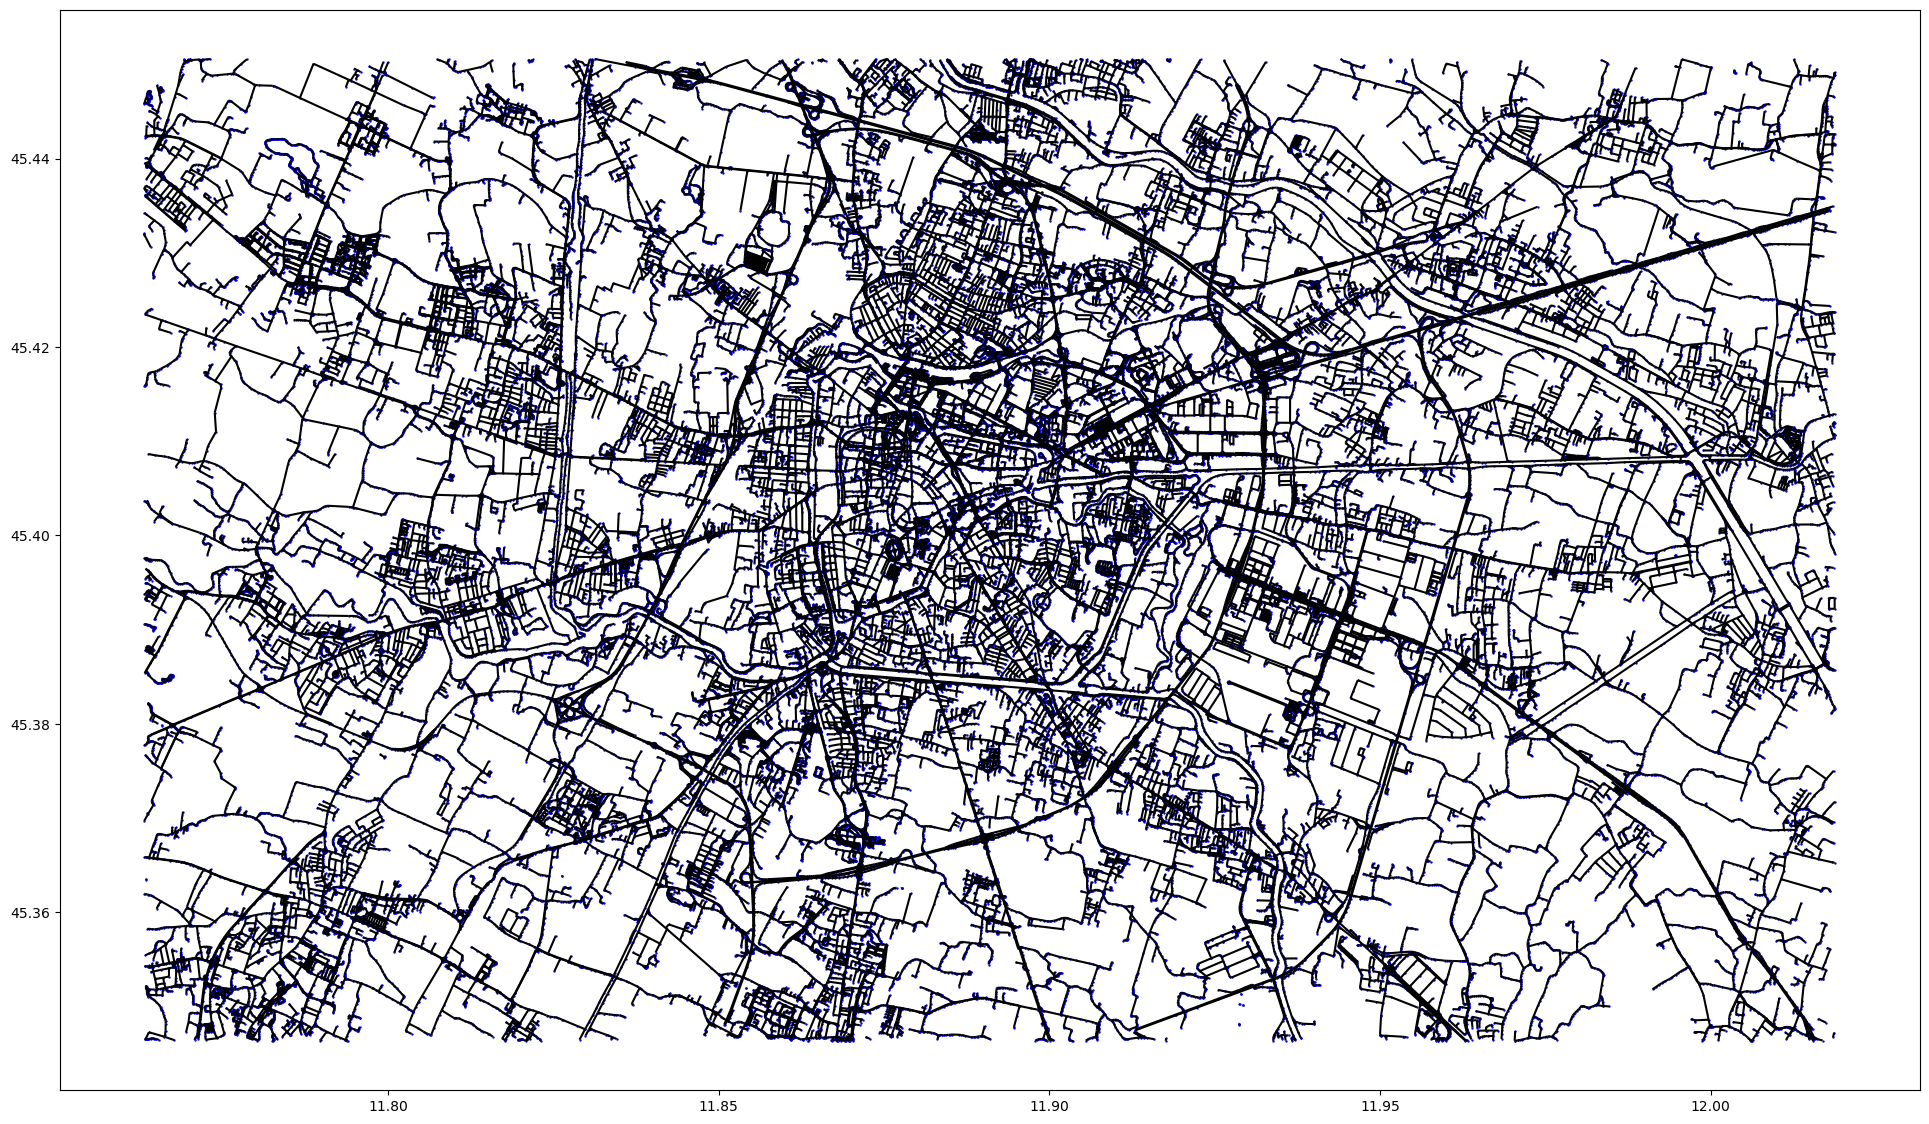

In [3]:
# Plot nodes and edges on a map
ax = edges.plot(figsize=(24,24), color="black")
ax = nodes.plot(ax=ax, color="blue", markersize=0.5)

Let's take a closer look at the edges

In [4]:
edges.head(10)

access  area bicycle bicycle_road bridge busway cycleway est_width  foot  \
0   None  None    None         None   None   None     None      None  None   
1   None  None    None         None   None   None     None      None  None   
2   None  None    None         None   None   None     None      None  None   
3   None  None    None         None   None   None     None      None  None   
4   None  None    None         None   None   None     None      None  None   
5   None  None    None         None   None   None     None      None  None   
6   None  None    None         None   None   None     None      None  None   
7   None  None    None         None   None   None     None      None  None   
8   None  None    None         None   None   None     None      None  None   
9   None  None    None         None   None   None     None      None  None   

  footway  ... width        id timestamp version  \
0    None  ...  None   4784935         0      -1   
1    None  ...  None   6235344         0      -1   
2    None  ...  None   6235344         0      -1   
3    None  ...  None   6235344         0      -1   
4    None  ...  None   6235344         0      -1   
5    None  ...  None   6235344         0      -1   
6    None  ...  None   8561258         0      -1   
7    None  ...  None   8561258         0      -1   
8    None  ...  None  17278517         0      -1   
9    None  ...  None  17278517         0      -1   

                                                tags osm_type  \
0                                     {"toll":"yes"}      way   
1  {"destination":"Padova zona industriale","toll...      way   
2  {"destination":"Padova zona industriale","toll...      way   
3  {"destination":"Padova zona industriale","toll...      way   
4  {"destination":"Padova zona industriale","toll...      way   
5  {"destination":"Padova zona industriale","toll...      way   
6                                 {"old_ref":"SP40"}      way   
7                                 {"old_ref":"SP40"}      way   
8                                 {"old_ref":"SS11"}      way   
9                                 {"old_ref":"SS11"}      way   

                                            geometry            u  \
0  LINESTRING (11.95968 45.42253, 11.96133 45.42288)     30644461   
1  LINESTRING (11.95687 45.38891, 11.95643 45.38805)    333769941   
2  LINESTRING (11.95643 45.38805, 11.95592 45.38680)  10067022829   
3  LINESTRING (11.95592 45.38680, 11.95586 45.38667)   4793510668   
4  LINESTRING (11.95586 45.38667, 11.95579 45.38657)    333769942   
5  LINESTRING (11.95579 45.38657, 11.95572 45.38649)   3910435630   
6  LINESTRING (11.95399 45.38893, 11.95581 45.38845)   3623942065   
7  LINESTRING (11.95581 45.38845, 11.95640 45.38829)    663316177   
8  LINESTRING (11.89784 45.40749, 11.89779 45.40747)   3898968632   
9  LINESTRING (11.89779 45.40747, 11.89770 45.40743)   1977916520   

             v   length  
0    271871529  134.373  
1  10067022829  102.141  
2   4793510668  144.972  
3    333769942   15.111  
4   3910435630   12.102  
5   3910435629   10.574  
6    663316177  151.398  
7     52080257   49.819  
8   1977916520    4.697  
9    179008735    8.328  

[10 rows x 43 columns]

Let's take a closer look at the nodes

In [ ]:
nodes.head(10)

Now we can insert nodes into the RDF

In [8]:
for index, node in nodes.iterrows():
    print('insert nodes into graph')
    break

insert nodes into graph


Now we can insert edges into the RDF

In [9]:
for index, edge in edges.iterrows():
    print('insert edges into graph')
    break

insert edges into graph


## Buildings

In [10]:
buildings = osm.get_buildings()

Now let's plot all the buildings

<AxesSubplot: >

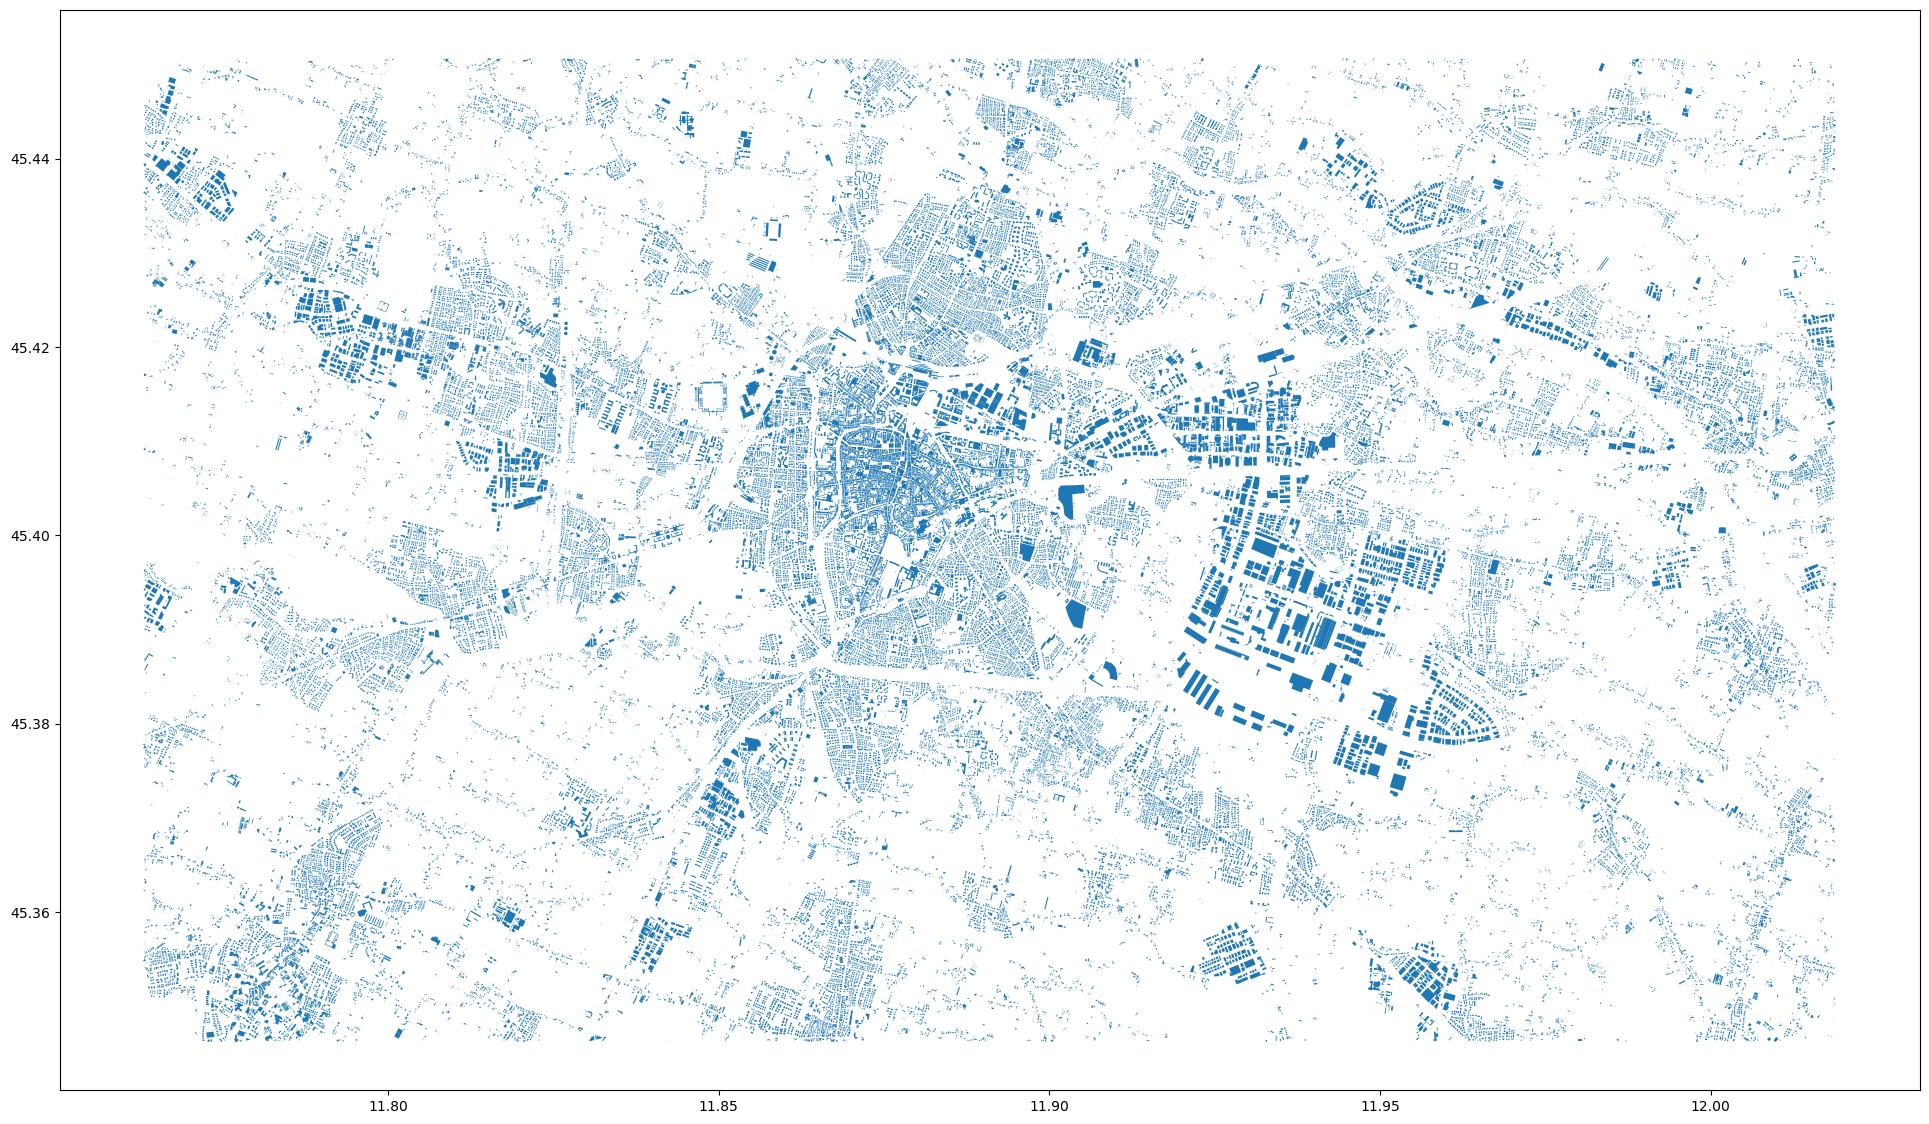

In [11]:
buildings.plot(figsize=(24,24))

Let's take a closer look at the building's data

In [12]:
buildings.head(10)

addr:city addr:country addr:housenumber addr:housename addr:postcode  \
0      None         None             None           None          None   
1      None         None             None           None          None   
2    Padova         None               11           None         35123   
3      None         None             None           None          None   
4      None         None             None           None          None   
5      None         None             None           None          None   
6      None         None             None           None          None   
7      None         None             None           None          None   
8      None         None             None           None          None   
9      None         None               50           None         35131   

        addr:street email                                   name  \
0              None  None                                   IKEA   
1              None  None            Centro Commerciale Ipercity   
2  Piazza del Santo  None     Basilica di sant'Antonio Di Padova   
3              None  None                  Palazzo della Ragione   
4              None  None  Collegio Universitario "Don N. Mazza"   
5              None  None               Dipartimento di Economia   
6              None  None            Centro Cpmmerciale di Abano   
7              None  None        Acegas-APS - Ecocentro "Stanga"   
8              None  None   Centro Congressi Padova "A. Luciani"   
9       Via Trieste  None                          Padova Centro   

       opening_hours              operator  ... start_date  \
0  Mo-Su 09:30-20:30                  None  ...       None   
1               None                  None  ...       None   
2               None                  None  ...       None   
3               None                  None  ...       None   
4               None                  None  ...       None   
5               None  Università di Padova  ...       None   
6               None                  None  ...       None   
7               None                  None  ...       None   
8               None                  None  ...       None   
9               None          Interparking  ...       None   

                               wikipedia        id timestamp version  \
0                                   None  24317204         0      -1   
1                                   None  25937164         0      -1   
2  it:Basilica di Sant'Antonio di Padova  27198535         0      -1   
3      it:Palazzo della Ragione (Padova)  29494033         0      -1   
4                                   None  31716308         0      -1   
5                                   None  39686452         0      -1   
6                                   None  40437112         0      -1   
7                                   None  44888801         0      -1   
8                                   None  45407748         0      -1   
9                                   None  46970554         0      -1   

                                                tags osm_type  \
0                   {"layer":"1","wheelchair":"yes"}      way   
1                               {"wheelchair":"yes"}      way   
2  {"building:architecture":"romanesque;gothic","...      way   
3  {"internet_access:fee":"no","internet_access:o...      way   
4                                     {"layer":"-1"}      way   
5                                               None      way   
6                                               None      way   
7                                               None      way   
8                                               None      way   
9  {"access":"yes","alt_name":"Parcheggio","build...      way   

                                            geometry building:min_level  \
0  POLYGON ((11.93403 45.41963, 11.93428 45.41904...                NaN   
1  POLYGON ((11.85399 45.37861, 11.85396 45.37838...                NaN   
2  POLYGON ((11.88019

In [14]:
buildings['addr:city'].unique()

array([None, 'Padova', 'Abano Terme', 'Ponte San Nicolò',
       'Ponte San Nilcolò', 'Albignasego', 'Vigonovo', 'Teolo', 'Stra',
       'Vigonza', 'Legnaro', 'Padua', 'Torre',
       "Sant'Angelo di Piove di Sacco", 'Busa', 'Cadoneghe',
       'Noventa Padovana', 'Saonara', 'Rubano', 'Caselle di Selvazzano',
       'Selvazzano Dentro'], dtype=object)

Now we can insert the buildings into the RDF

In [15]:
for index, building in buildings.iterrows():
    print('insert buildings into graph')
    break

insert buildings into graph


## Points of Interest (pois)

Let's get the points of interest

In [16]:
pois = osm.get_pois()

C:\Users\ASUS\anaconda3\envs\boring-wozniak\lib\site-packages\pyrosm\pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(


And take a look at them

In [17]:
pois.head(10)

tags        lat         id  \
0  {"brand":"Q8","brand:wikidata":"Q1634762","fue...  45.408813  215541278   
1  {"brand":"Esso Express","brand:wikidata":"Q235...  45.410294  215541291   
2  {"brand":"Api-Ip","brand:wikidata":"Q3995933",...  45.397152  215543602   
3                               {"brand":"Agip Eni"}  45.400730  215550122   
4  {"brand":"Api-Ip","fuel:diesel":"yes","fuel:oc...  45.396347  215823249   
5  {"automated":"yes","brand":"OIL!","brand:wikid...  45.386353  215827913   
6  {"brand":"Esso","fuel:GTL_diesel":"yes","fuel:...  45.389965  215930623   
7  {"brand":"Major","fuel:GTL_diesel":"yes","fuel...  45.390125  215930626   
8  {"brand":"Esso","fuel:diesel":"yes","fuel:octa...  45.389469  215935601   
9  {"brand":"Api-Ip","fixme":"position","ref:mise...  45.394497  215935602   

   timestamp  changeset  version        lon addr:city addr:country  \
0          0        0.0        0  11.903057      None         None   
1          0        0.0        0  11.907196      None         None   
2          0        0.0        0  11.899335      None         None   
3          0        0.0        0  11.888532      None         None   
4          0        0.0        0  11.888076      None         None   
5          0        0.0        0  11.897065      None         None   
6          0        0.0        0  11.871020      None         None   
7          0        0.0        0  11.879559      None         None   
8          0        0.0        0  11.866799      None         None   
9          0        0.0        0  11.865470      None         None   

  addr:housenumber  ...                   geometry osm_type building:levels  \
0             None  ...  POINT (11.90306 45.40881)     node             NaN   
1             None  ...  POINT (11.90720 45.41029)     node             NaN   
2             None  ...  POINT (11.89933 45.39715)     node             NaN   
3             None  ...  POINT (11.88853 45.40073)     node             NaN   
4             None  ...  POINT (11.88808 45.39635)     node             NaN   
5             None  ...  POINT (11.89707 45.38635)     node             NaN   
6             None  ...  POINT (11.87102 45.38997)     node             NaN   
7             None  ...  POINT (11.87956 45.39013)     node             NaN   
8             None  ...  POINT (11.86680 45.38947)     node             NaN   
9             None  ...  POINT (11.86547 45.39450)     node             NaN   

  fast_food fountain  spa kiosk motorcycle water hotel  
0       NaN      NaN  NaN   NaN        NaN   NaN   NaN  
1       NaN      NaN  NaN   NaN        NaN   NaN   NaN  
2       NaN      NaN  NaN   NaN        NaN   NaN   NaN  
3       NaN      NaN  NaN   NaN        NaN   NaN   NaN  
4       NaN      NaN  NaN   NaN        NaN   NaN   NaN  
5       NaN      NaN  NaN   NaN        NaN   NaN   NaN  
6       NaN      NaN  NaN   NaN        NaN   NaN   NaN  
7       NaN      NaN  NaN   NaN        NaN   NaN   NaN  
8       NaN      NaN  NaN   NaN        NaN   NaN   NaN  
9       NaN      NaN  NaN   NaN        NaN   NaN   NaN  

[10 rows x 69 columns]

Now let's plot them

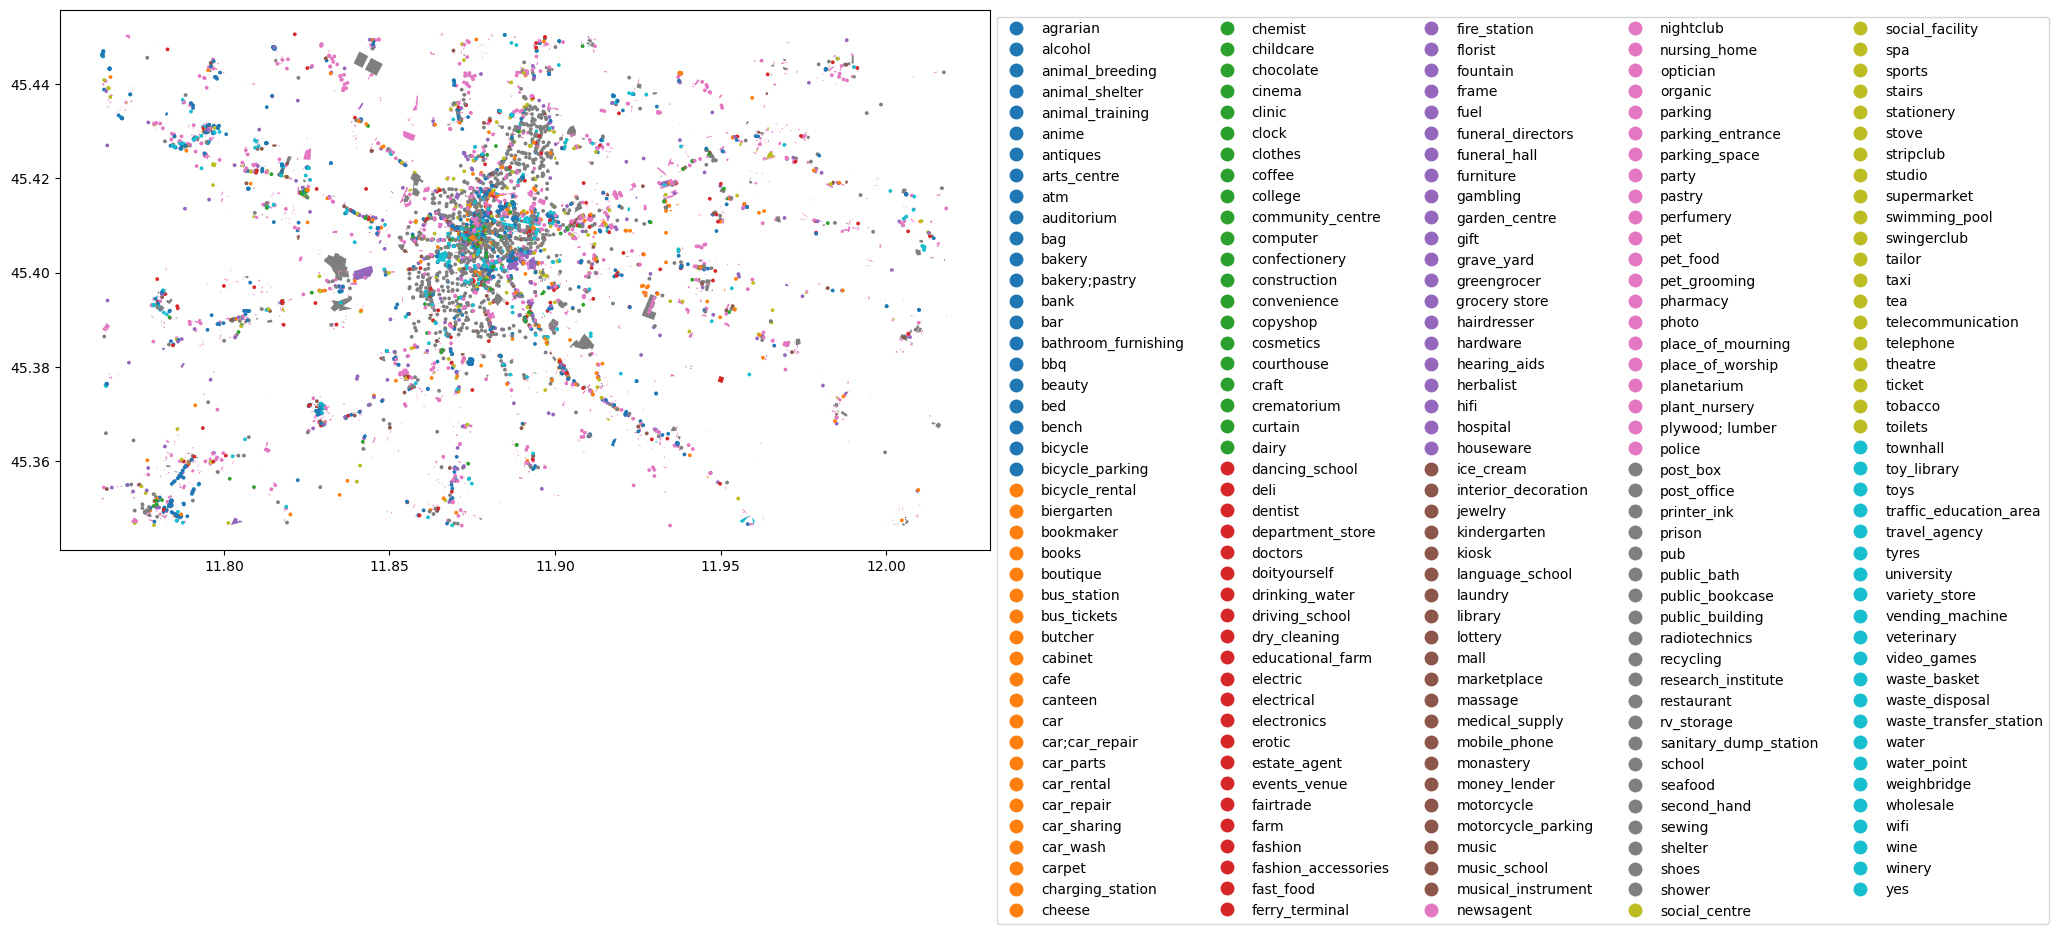

In [18]:
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

Now we can insert them into the RDF

In [ ]:
for index, poi in pois.iterrows():
    print('insert pois into graph')
    break